In [26]:
import requests, time
import pandas as pd, numpy as np

In [1]:
import requests

# Initialize parameters
all_products = []
page = 1
page_size = 1000  # 1000 records per page for faster collection

while len(all_products) < 12000:
    url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size={page_size}&page={page}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        products = data.get('products', [])
        if not products:
            break  # No more products; exit loop
        all_products.extend(products)
        print(f"Collected {len(all_products)} records, page {page}")
        page += 1
    else:
        print(f"Request failed at page {page}")
        break  # Stop if a request fails

# Truncate to 12,000 records if needed
all_products = all_products[:12000]

print(f"Total records collected: {len(all_products)}")

Collected 100 records, page 1
Collected 200 records, page 2
Collected 300 records, page 3
Collected 400 records, page 4
Collected 500 records, page 5
Collected 600 records, page 6
Collected 700 records, page 7
Collected 800 records, page 8
Collected 900 records, page 9
Collected 1000 records, page 10
Collected 1100 records, page 11
Collected 1200 records, page 12
Collected 1300 records, page 13
Collected 1400 records, page 14
Collected 1499 records, page 15
Collected 1599 records, page 16
Collected 1699 records, page 17
Collected 1799 records, page 18
Collected 1899 records, page 19
Collected 1999 records, page 20
Collected 2099 records, page 21
Collected 2199 records, page 22
Collected 2299 records, page 23
Collected 2399 records, page 24
Collected 2499 records, page 25
Collected 2599 records, page 26
Collected 2699 records, page 27
Collected 2799 records, page 28
Collected 2899 records, page 29
Collected 2999 records, page 30
Collected 3099 records, page 31
Collected 3199 records, pa

In [2]:
import pandas as pd

df = pd.DataFrame(all_products)
display(df.head())

,brands,code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
brands          535
code              0
nutriments        0
product_name    253
dtype: int64


In [4]:
# Handle missing values by imputing
df['brands'] = df['brands'].fillna('Unknown Brand')
df['product_name'] = df['product_name'].fillna('Unknown Product')

# Verify that missing values have been handled
missing_values_after = df.isnull().sum()
print("\nMissing values per column after handling:")
print(missing_values_after)


Missing values per column after handling:
brands          0
code            0
nutriments      0
product_name    0
dtype: int64


In [5]:
import numpy as np

nutrient_keys = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

for key in nutrient_keys:
    df[key] = df['nutriments'].apply(lambda x: x.get(key, np.nan))

display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0


In [6]:
nutrient_keys = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

for key in nutrient_keys:
    df[key] = pd.to_numeric(df[key], errors='coerce')

display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0


In [7]:
nutrient_keys = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

for key in nutrient_keys:
    median_value = df[key].median()
    df[key] = df[key].fillna(median_value)

# Verify that missing values have been handled
missing_values_after_imputation = df[nutrient_keys].isnull().sum()
print("\nMissing values per nutrient column after imputation:")
print(missing_values_after_imputation)


Missing values per nutrient column after imputation:
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0
dtype: int64


In [8]:
df['sugar_to_carb_ratio'] = df['sugars_value'] / df['carbohydrates_value']
df['sugar_to_carb_ratio'] = df['sugar_to_carb_ratio'].replace([np.inf, -np.inf], np.nan)
display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,4.0,1.0,0.0,0.333333
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,4.1,3.0,1.4,8.0,2.5,0.37250,0.149000,3.0,7.0,0.0,0.436170
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,241.0,1197.5,15.0,4.1,6.2,1.4,5.6,2.5,65.00000,26.000000,4.0,0.0,0.0,0.273333
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,241.0,1197.5,15.0,4.1,6.2,1.4,5.6,2.5,65.00000,26.000000,1.0,0.0,0.0,0.273333
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,4.0,0.0,0.0,NaN


In [9]:
def categorize_calories(kcal):
    if pd.isna(kcal):
        return 'Unknown'
    elif kcal < 100:
        return 'Low'
    elif kcal < 400:
        return 'Medium'
    else:
        return 'High'

df['calorie_category'] = df['energy-kcal_value'].apply(categorize_calories)

display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,4.0,1.0,0.0,0.333333,Low
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,4.1,3.0,1.4,8.0,2.5,0.37250,0.149000,3.0,7.0,0.0,0.436170,Low
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,241.0,1197.5,15.0,4.1,6.2,1.4,5.6,2.5,65.00000,26.000000,4.0,0.0,0.0,0.273333,Medium
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,241.0,1197.5,15.0,4.1,6.2,1.4,5.6,2.5,65.00000,26.000000,1.0,0.0,0.0,0.273333,Medium
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,4.0,0.0,0.0,NaN,Low


In [10]:
def categorize_sugar(sugar_value):
    if pd.isna(sugar_value):
        return 'Unknown'
    elif sugar_value < 5:
        return 'Low Sugar'
    elif sugar_value < 15:
        return 'Medium Sugar'
    else:
        return 'High Sugar'

df['sugar_category'] = df['sugars_value'].apply(categorize_sugar)

display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,4.0,1.0,0.0,0.333333,Low,Medium Sugar
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,4.1,3.0,1.4,8.0,2.5,0.37250,0.149000,3.0,7.0,0.0,0.436170,Low,Low Sugar
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,241.0,1197.5,15.0,4.1,6.2,1.4,5.6,2.5,65.00000,26.000000,4.0,0.0,0.0,0.273333,Medium,Low Sugar
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,241.0,1197.5,15.0,4.1,6.2,1.4,5.6,2.5,65.00000,26.000000,1.0,0.0,0.0,0.273333,Medium,Low Sugar
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,4.0,0.0,0.0,NaN,Low,Low Sugar


In [11]:
def is_ultra_processed(nova_group):
    if nova_group == 4:
        return 1
    else:
        return 0

df['is_ultra_processed'] = df['nova-group'].apply(is_ultra_processed)

display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,...,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,...,0.0,0.00000,0.000000,4.0,1.0,0.0,0.333333,Low,Medium Sugar,1
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,4.1,3.0,1.4,...,2.5,0.37250,0.149000,3.0,7.0,0.0,0.436170,Low,Low Sugar,0
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,241.0,1197.5,15.0,4.1,6.2,1.4,...,2.5,65.00000,26.000000,4.0,0.0,0.0,0.273333,Medium,Low Sugar,1
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,241.0,1197.5,15.0,4.1,6.2,1.4,...,2.5,65.00000,26.000000,1.0,0.0,0.0,0.273333,Medium,Low Sugar,0
4,AQUAFINA,6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00508,0.002032,4.0,0.0,0.0,NaN,Low,Low Sugar,1


In [12]:
print("Shape of the DataFrame:", df.shape)
print("\nColumns of the DataFrame:", df.columns)
print("\nData types of the DataFrame:")
df.info()

Shape of the DataFrame: (12000, 21)

Columns of the DataFrame: Index(['brands', 'code', 'nutriments', 'product_name', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'sugar_to_carb_ratio', 'calorie_category', 'sugar_category',
       'is_ultra_processed'],
      dtype='object')

Data types of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   brands                                                 12000 non-null  object 
 1   code                                                   12000 non-nu

In [13]:
missing_values_final = df.isnull().sum()
print("Remaining missing values per column after cleaning and feature engineering:")
print(missing_values_final)

Remaining missing values per column after cleaning and feature engineering:
brands                                                     0
code                                                       0
nutriments                                                 0
product_name                                               0
energy-kcal_value                                          0
energy-kj_value                                            0
carbohydrates_value                                        0
sugars_value                                               0
fat_value                                                  0
saturated-fat_value                                        0
proteins_value                                             0
fiber_value                                                0
salt_value                                                 0
sodium_value                                               0
nova-group                                                 0
nutrition

In [14]:
df['sugar_to_carb_ratio'].fillna(df['sugar_to_carb_ratio'].median(), inplace=True)

C:\Users\nagam\AppData\Local\Temp\ipykernel_9348\2594597326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sugar_to_carb_ratio'].fillna(df['sugar_to_carb_ratio'].median(), inplace=True)


In [15]:
df.isnull().sum()

brands                                                   0
code                                                     0
nutriments                                               0
product_name                                             0
energy-kcal_value                                        0
energy-kj_value                                          0
carbohydrates_value                                      0
sugars_value                                             0
fat_value                                                0
saturated-fat_value                                      0
proteins_value                                           0
fiber_value                                              0
salt_value                                               0
sodium_value                                             0
nova-group                                               0
nutrition-score-fr                                       0
fruits-vegetables-nuts-estimate-from-ingredients_100g   

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Descriptive Statistics for Key Nutrient Columns:
       energy-kcal_value  sugars_value  carbohydrates_value  \
count       12000.000000  12000.000000         12000.000000   
mean          277.077186     10.852967            28.522274   
std           463.118517     18.685673            91.172552   
min             0.000000      0.000000             0.000000   
25%            97.000000      1.200000             4.900000   
50%           241.000000      4.100000            15.000000   
75%           419.000000     11.325000            53.000000   
max         45793.499044    895.000000          8989.000000   

       sugar_to_carb_ratio  
count         12000.000000  
mean              5.511507  
std             474.563873  
min               0.000000  
25%               0.130000  
50%               0.418182  
75%               0.888889  
max           51250.000000  


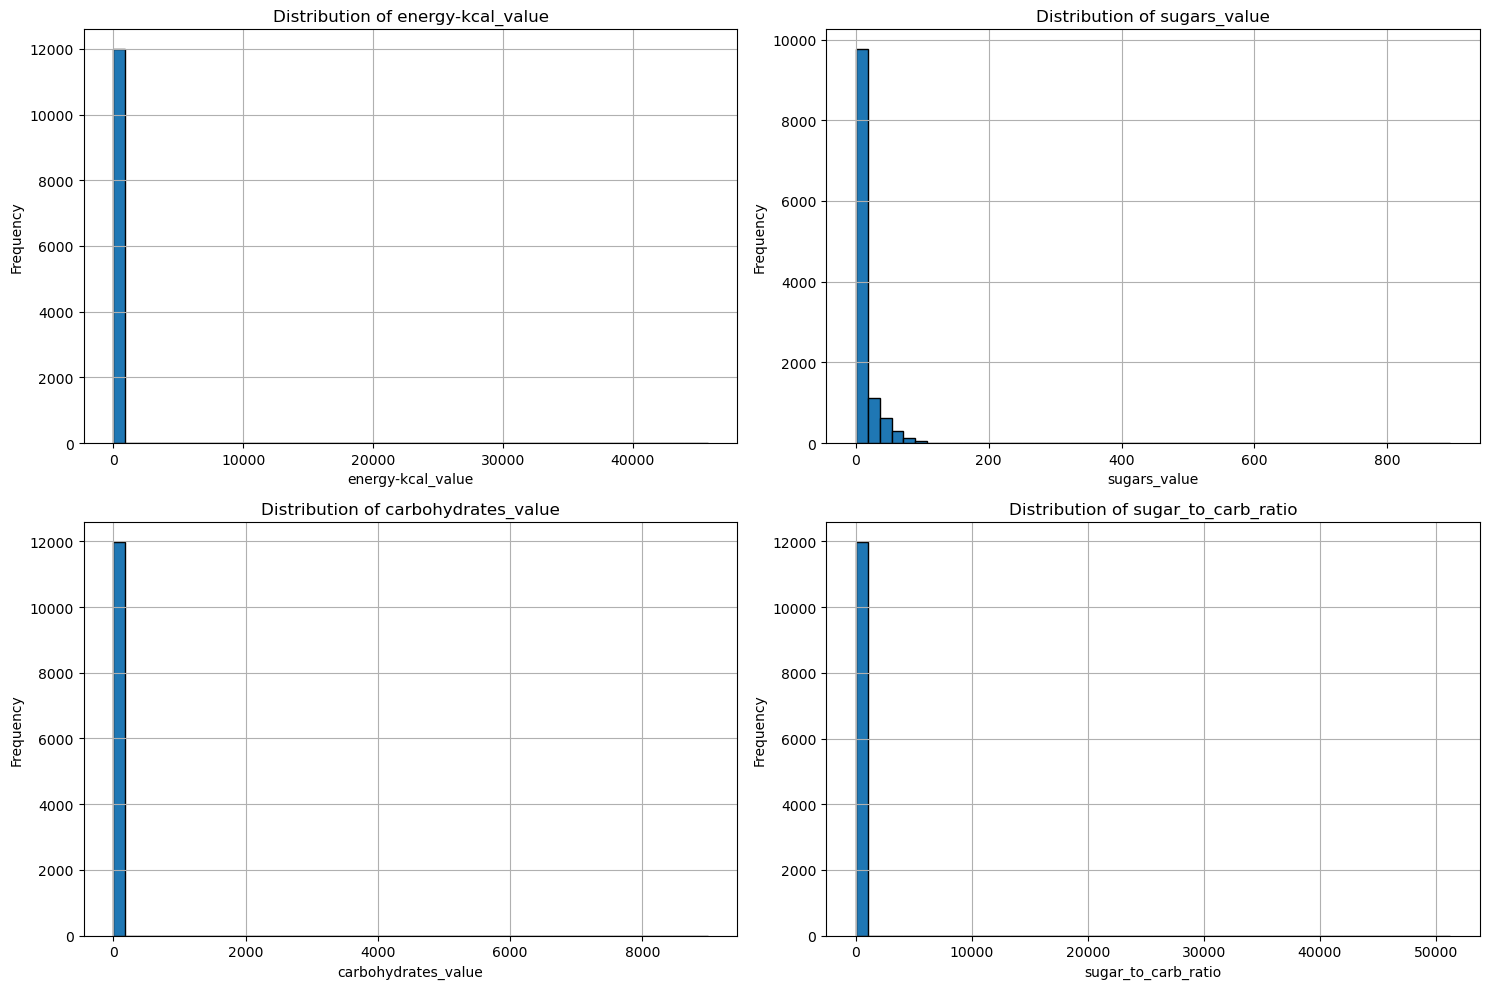

In [16]:
import matplotlib.pyplot as plt

selected_columns = ['energy-kcal_value', 'sugars_value', 'carbohydrates_value', 'sugar_to_carb_ratio']

# Calculate descriptive statistics
print("Descriptive Statistics for Key Nutrient Columns:")
print(df[selected_columns].describe())

# Create histograms
plt.figure(figsize=(15, 10))

for i, col in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    df[col].hist(bins=50, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

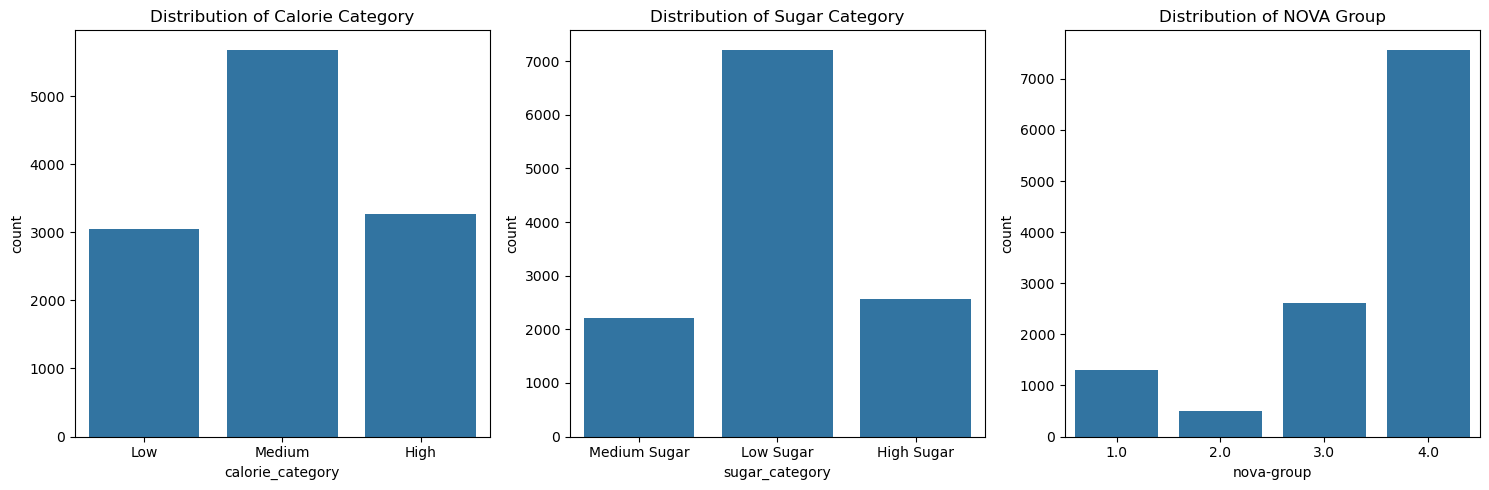

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(ax=axes[0], x='calorie_category', data=df)
axes[0].set_title('Distribution of Calorie Category')

sns.countplot(ax=axes[1], x='sugar_category', data=df)
axes[1].set_title('Distribution of Sugar Category')

sns.countplot(ax=axes[2], x='nova-group', data=df)
axes[2].set_title('Distribution of NOVA Group')

plt.tight_layout()
plt.show()

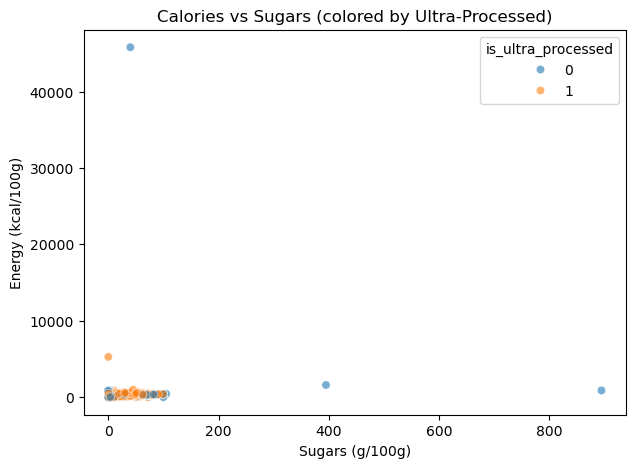

In [18]:
# Scatter: Calories vs Sugars
plt.figure(figsize=(7,5))
sns.scatterplot(x="sugars_value", y="energy-kcal_value",
                hue="is_ultra_processed", alpha=0.6, data=df)
plt.title("Calories vs Sugars (colored by Ultra-Processed)")
plt.xlabel("Sugars (g/100g)")
plt.ylabel("Energy (kcal/100g)")
plt.show()

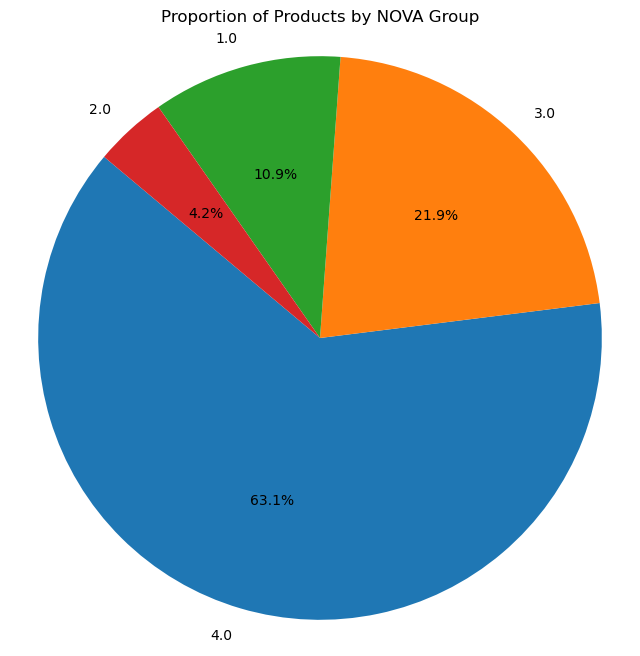

In [19]:
import matplotlib.pyplot as plt

nova_group_counts = df['nova-group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(nova_group_counts, labels=nova_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Products by NOVA Group')
plt.axis('equal')
plt.show()


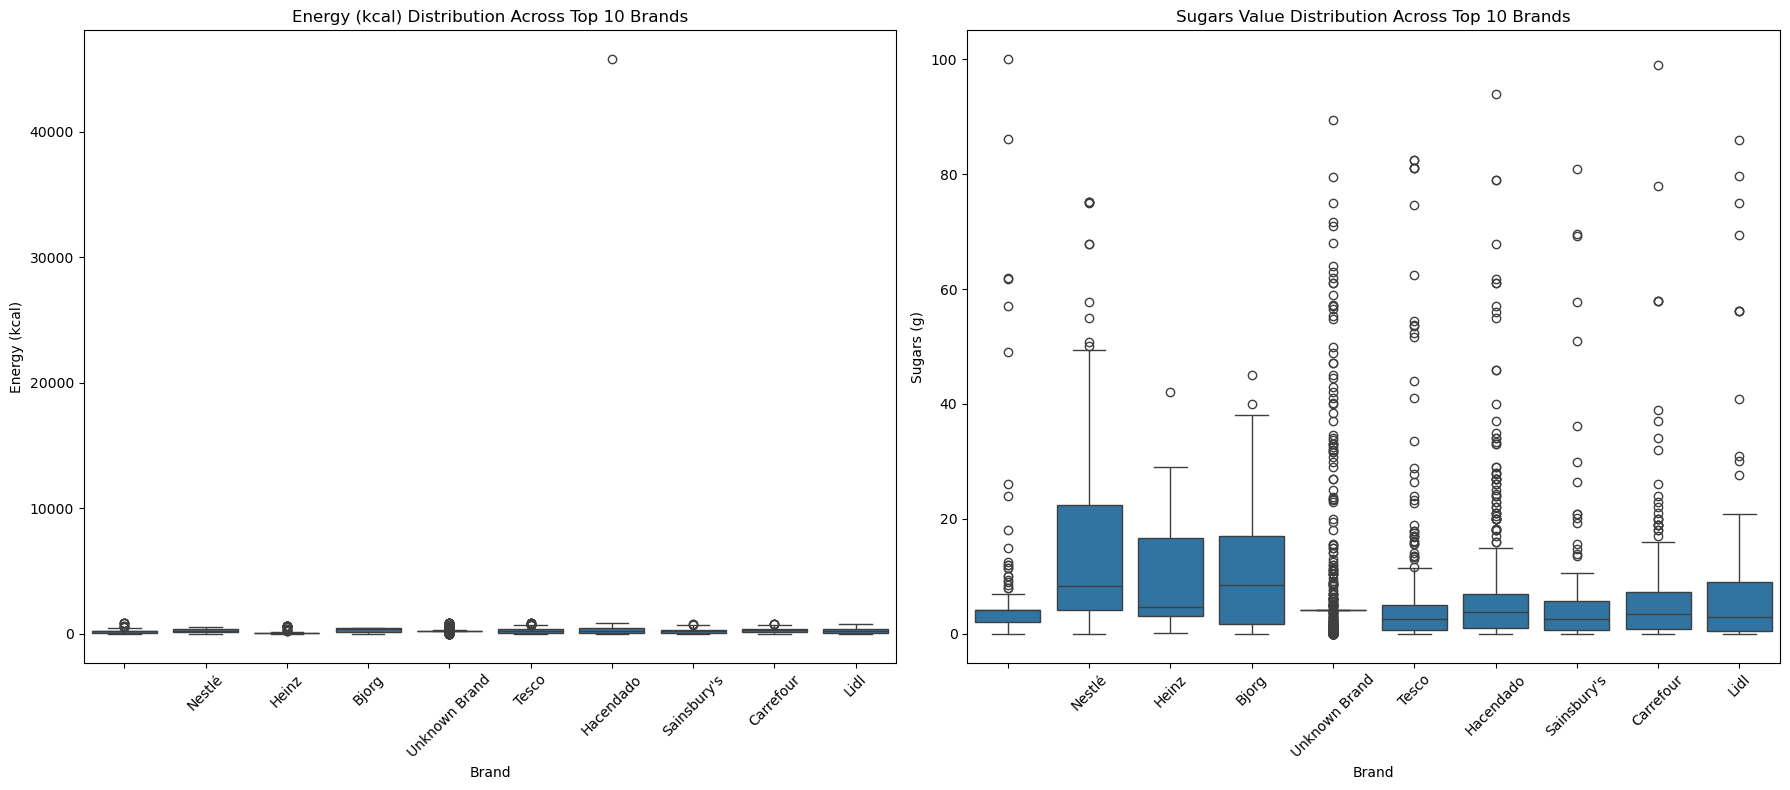

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the top N brands (e.g., top 10)
n_top_brands = 10
top_brands = df['brands'].value_counts().nlargest(n_top_brands).index.tolist()

# Filter the DataFrame to include only products from these top N brands
df_top_brands = df[df['brands'].isin(top_brands)]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Box plot for energy-kcal_value
sns.boxplot(ax=axes[0], x='brands', y='energy-kcal_value', data=df_top_brands)
axes[0].set_title(f'Energy (kcal) Distribution Across Top {n_top_brands} Brands')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Energy (kcal)')
axes[0].tick_params(axis='x', rotation=45)

# Box plot for sugars_value
sns.boxplot(ax=axes[1], x='brands', y='sugars_value', data=df_top_brands)
axes[1].set_title(f'Sugars Value Distribution Across Top {n_top_brands} Brands')
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('Sugars (g)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

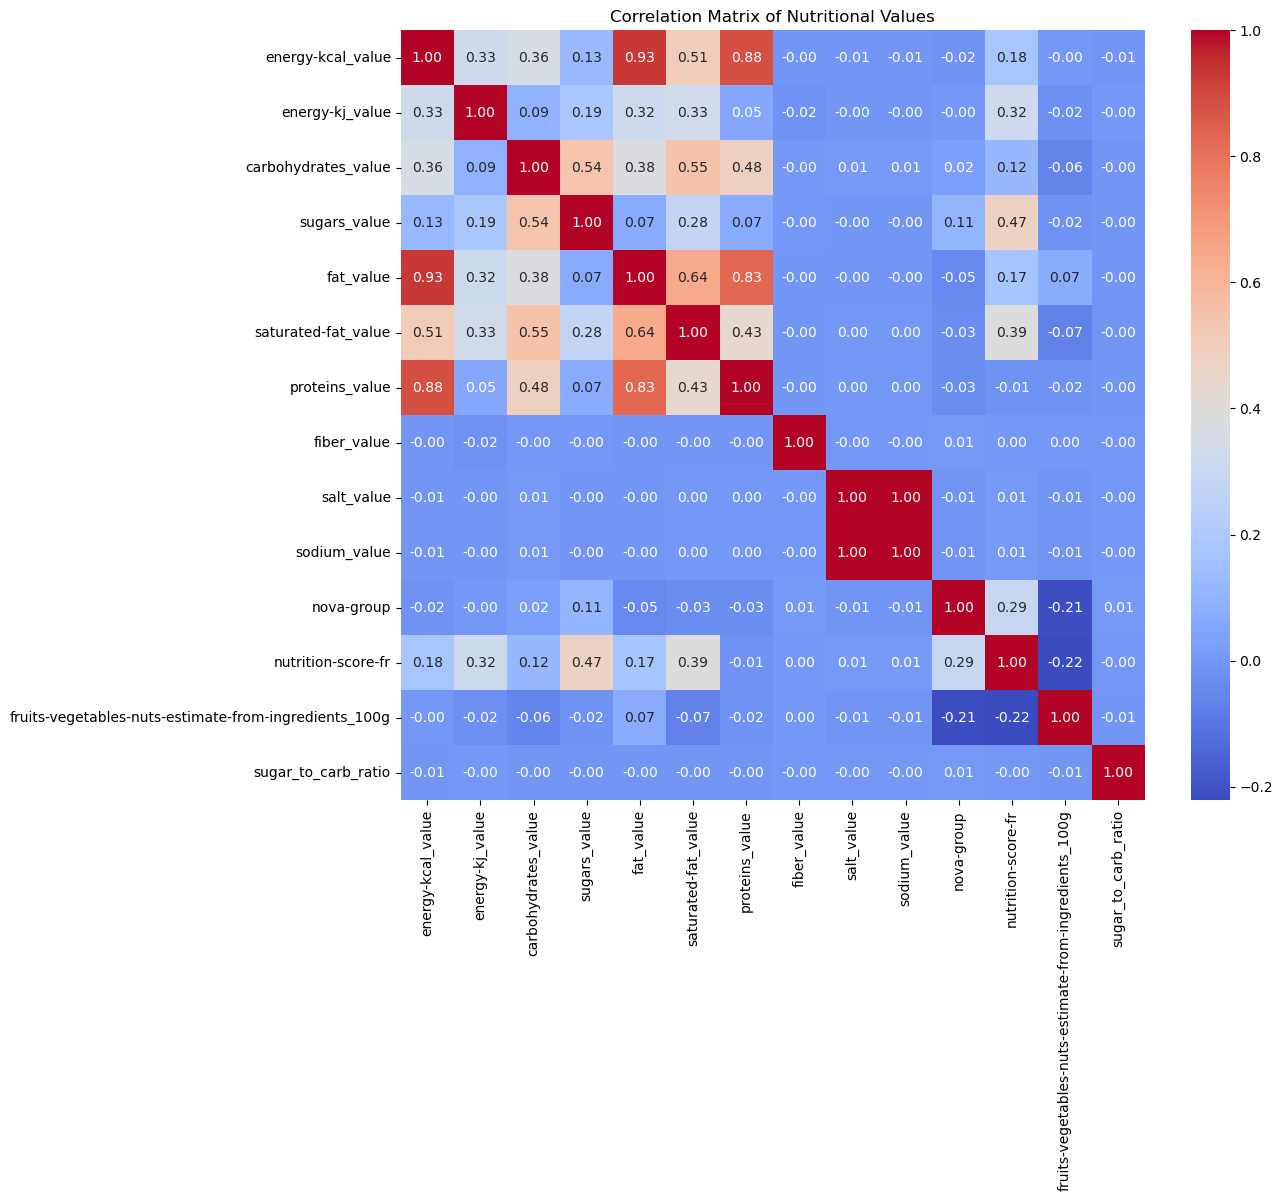

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g',
    'sugar_to_carb_ratio'
]

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Nutritional Values')
plt.show()

In [22]:
df['brands']

0                                    Sidi Ali
1                                      Jaouda
2                                    sidi ali
3        Les Eaux Minérales d'oulmès,Sidi Ali
4                                    AQUAFINA
                         ...                 
11995                           Unknown Brand
11996                           Unknown Brand
11997                         Martínez Somalo
11998                                    Asda
11999                                  Cucina
Name: brands, Length: 12000, dtype: object

In [47]:
df.columns

Index(['brands', 'code', 'nutriments', 'product_name', 'energy-kcal_value',
       'energy-kj_value', 'carbohydrates_value', 'sugars_value', 'fat_value',
       'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value',
       'sodium_value', 'nova-group', 'nutrition-score-fr',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'sugar_to_carb_ratio', 'calorie_category', 'sugar_category',
       'is_ultra_processed'],
      dtype='object')

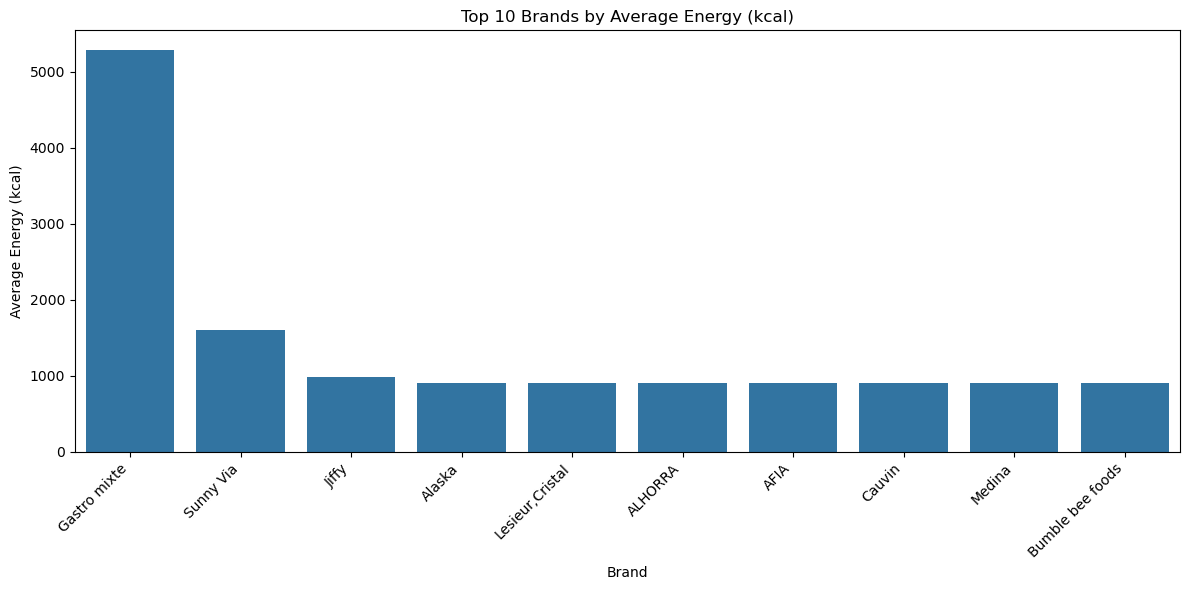

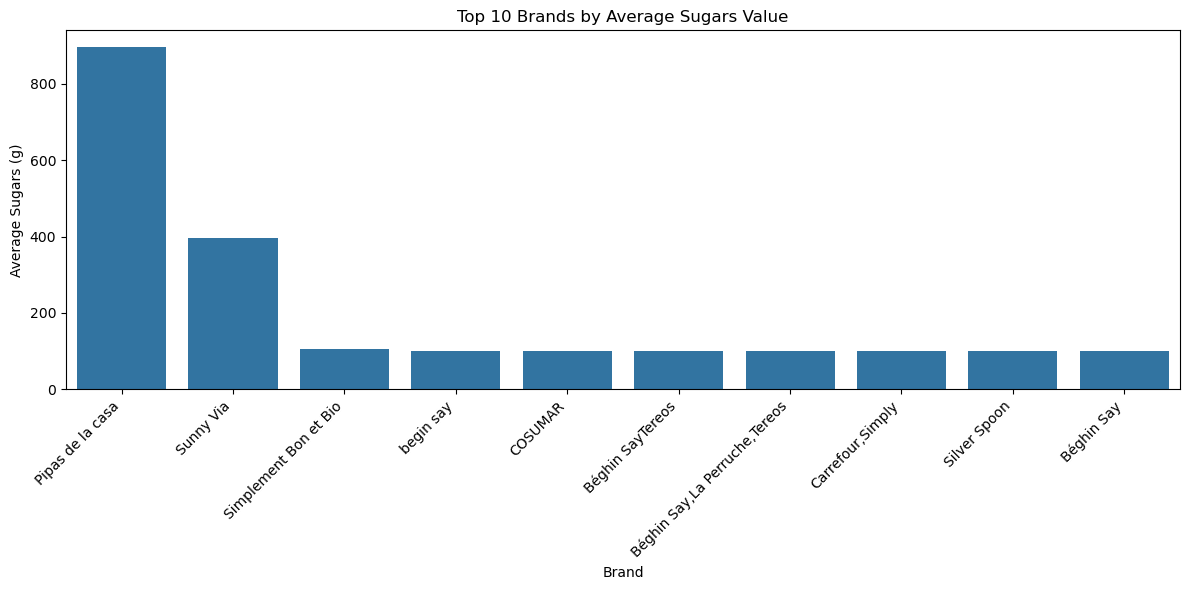

In [23]:
# Group by brands and calculate the mean for energy and sugar
brand_nutrients = df.groupby('brands')[['energy-kcal_value', 'sugars_value']].mean()

# Determine the top N brands for each nutrient
n_top_brands = 10
top_energy_brands = brand_nutrients.sort_values(by='energy-kcal_value', ascending=False).head(n_top_brands)
top_sugar_brands = brand_nutrients.sort_values(by='sugars_value', ascending=False).head(n_top_brands)

# Create bar plot for top energy brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_energy_brands.index, y='energy-kcal_value', data=top_energy_brands)
plt.title(f'Top {n_top_brands} Brands by Average Energy (kcal)')
plt.xlabel('Brand')
plt.ylabel('Average Energy (kcal)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create bar plot for top sugar brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sugar_brands.index, y='sugars_value', data=top_sugar_brands)
plt.title(f'Top {n_top_brands} Brands by Average Sugars Value')
plt.xlabel('Brand')
plt.ylabel('Average Sugars (g)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
import mysql.connector

In [24]:
import mysql.connector

mydb= mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    autocommit=True
    )
print(mydb)
mycursor=mydb.cursor()

mycursor.execute("SHOW DATABASES")
for x in mycursor:
    print(x)


('choco_crunch',)
('chococrunch',)
('information_schema',)
('mysql',)
('performance_schema',)
('phpmyadmin',)
('test',)


In [25]:
mycursor = mydb.cursor(buffered=True)

In [67]:
mycursor.execute("Drop database ChocoCrunch") 

In [68]:
mycursor.execute("create database ChocoCrunch")

In [69]:
mycursor.execute("USE ChocoCrunch")

In [76]:
mycursor.execute("drop table if exists dervied_metric")

In [ ]:
mycursor.execute("""
CREATE TABLE product_info (
    code VARCHAR(255) PRIMARY KEY,
    product_name TEXT,
    brands TEXT
);
""")
mydb.commit()


mycursor.execute("""
CREATE TABLE nutrient_info (
    code VARCHAR(255) PRIMARY KEY,
    `energy-kcal_value` REAL,
    `energy-kj_value` REAL,
    carbohydrates_value REAL,
    sugars_value REAL,
    fat_value REAL,
    `saturated-fat_value` REAL,
    proteins_value REAL,
    fiber_value REAL,
    salt_value REAL,
    sodium_value REAL,
    `fruits-vegetables-nuts-estimate-from-ingredients_100g` REAL,
    `nova-group` REAL,
    product_name TEXT,
    `nutrition-score-fr` REAL
                 
);
""")
mydb.commit()

mycursor.execute("""
CREATE TABLE derived_metrics (
    code VARCHAR(255) PRIMARY KEY,
    sugar_to_carb_ratio REAL,
    calorie_category TEXT,
    sugar_category TEXT,
    is_ultra_processed INTEGER
);
""")
mydb.commit()


In [77]:
for _, row in df.iterrows():
    mycursor.execute("""
        INSERT INTO product_info (code, product_name, brands)
        VALUES (%s, %s, %s);
    """, (row['code'], row['product_name'], row['brands']))
mydb.commit()

for _, row in df.iterrows():
    mycursor.execute("""
        INSERT INTO nutrient_info (
            code, `energy-kcal_value`, `energy-kj_value`, carbohydrates_value,
            sugars_value, fat_value, `saturated-fat_value`, proteins_value,
            fiber_value, salt_value, sodium_value,
            `fruits-vegetables-nuts-estimate-from-ingredients_100g`,
            `nova-group`, product_name, `nutrition-score-fr`
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    """, (
        row['code'], row['energy-kcal_value'], row['energy-kj_value'], row['carbohydrates_value'],
        row['sugars_value'], row['fat_value'], row['saturated-fat_value'], row['proteins_value'],
        row['fiber_value'], row['salt_value'], row['sodium_value'],
        row['fruits-vegetables-nuts-estimate-from-ingredients_100g'],
        row['nova-group'], row['product_name'], row['nutrition-score-fr']
    ))
mydb.commit()

for _, row in df.iterrows():
    mycursor.execute("""
        INSERT INTO derived_metrics (
            code, sugar_to_carb_ratio, calorie_category,
            sugar_category, is_ultra_processed
        ) VALUES (%s, %s, %s, %s, %s);
    """, (
        row['code'], row['sugar_to_carb_ratio'], row['calorie_category'],
        row['sugar_category'], row['is_ultra_processed']
    ))
mydb.commit()
print("Data inserted successfully.")

Data inserted successfully.


In [78]:
mycursor.execute("SELECT COUNT(*) FROM product_info")
print("Product Info Rows:", mycursor.fetchone()[0])

mycursor.execute("SELECT COUNT(*) FROM nutrient_info")
print("Nutrient Info Rows:", mycursor.fetchone()[0])

mycursor.execute("SELECT COUNT(*) FROM derived_metrics")
print("Derived Metrics Rows:", mycursor.fetchone()[0])

Product Info Rows: 12000
Nutrient Info Rows: 12000
Derived Metrics Rows: 12000


# SQL Queries

📑 product_info 

In [79]:
from tabulate import tabulate

In [80]:


mycursor.execute("""
    SELECT brands, COUNT(*) AS product_count
    FROM product_info
    GROUP BY brands
    ORDER BY product_count DESC
    LIMIT 50;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+----------------------------+-----------------+
| brands                     |   product_count |
|----------------------------+-----------------|
| Unknown Brand              |             535 |
| Hacendado                  |             379 |
| Tesco                      |             275 |
| Carrefour                  |             148 |
|                            |             109 |
| Nestlé                     |             103 |
| Bjorg                      |             103 |
| HEINZ                      |             102 |
| Lidl                       |              98 |
| Sainsbury's                |              82 |
| Jaouda                     |              81 |
| Danone                     |              80 |
| Bonne Maman                |              76 |
| Gerblé                     |              73 |
| Fleury Michon              |              72 |
| Aldi                       |              72 |
| Milbona                    |              71 |
| Kellogg's         

In [81]:
mycursor.execute("""
    SELECT brands, COUNT(DISTINCT product_name) AS unique_products
    FROM product_info
    GROUP BY brands;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+------------------------------------------------------------------------------------------------------------------------------------------------+-------------------+
| brands                                                                                                                                         |   unique_products |
|------------------------------------------------------------------------------------------------------------------------------------------------+-------------------|
|                                                                                                                                                |                70 |
| 03 x Aldi 09.25, 05 x Aldi 09.25, 07 x Aldi 09.25, 09 x Aldi 09.25, 11 x Aldi 09.25, 12 x Aldi 09.25-01 x Aldi 08.25, Milsani, 01 x Aldi 09.25 |                 1 |
| 1001 Delights (Lidl), Envia, Lidl, Milbona, Milbona (Lidl)                                                                                     |                 1 

In [82]:
mycursor.execute("""
    SELECT brands, COUNT(*) AS product_count
    FROM product_info
    GROUP BY brands
    ORDER BY product_count DESC
    LIMIT 5;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------+-----------------+
| brands        |   product_count |
|---------------+-----------------|
| Unknown Brand |             535 |
| Hacendado     |             379 |
| Tesco         |             275 |
| Carrefour     |             148 |
|               |             109 |
+---------------+-----------------+


In [83]:
mycursor.execute("""
    SELECT *
    FROM product_info
    WHERE product_name IS NULL OR TRIM(product_name) = '';
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------+----------------+---------------------------------------------------------------+
|          code | product_name   | brands                                                        |
|---------------+----------------+---------------------------------------------------------------|
| 0000200003087 |                | Walkers                                                       |
| 0012970422003 |                | Nutella                                                       |
|      00168069 |                | Marks & Spencer                                               |
| 0016843698748 |                | Dakota                                                        |
| 0040600029759 |                | Lindt                                                         |
| 0044490063114 |                | LU                                                            |
| 0121201800111 |                | Safia                                                         |
| 01254840

In [84]:
mycursor.execute("""
    SELECT COUNT(DISTINCT brands) AS unique_brand_count
    FROM product_info;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+----------------------+
|   unique_brand_count |
|----------------------|
|                 3400 |
+----------------------+


In [85]:
mycursor.execute("""
    SELECT *
    FROM product_info
    WHERE code LIKE '3%';
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------+
|          code | product_name                                                                                                                                                                                                                                | brands                                                                                        |
|---------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------

📑 nutrient_info

In [88]:
mycursor.execute("""
    SELECT product_name, code, `energy-kcal_value`
    FROM nutrient_info
    ORDER BY `energy-kcal_value` DESC
    LIMIT 10;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+----------------------------+---------------+---------------------+
| product_name               |          code |   energy-kcal_value |
|----------------------------+---------------+---------------------|
| Semillas de chía           | 8480000054647 |             45793.5 |
| Pizzarella premium         | 6111259090132 |              5280   |
| Sirop d'Agave              | 3088543506255 |              1600   |
| Corn Muffin Mix            | 0072486002205 |               990   |
| penaut butter creamy       | 0036000291452 |               904   |
| Kokosnussöl                |      20998141 |               900   |
| Huile d'Olive Vierge Extra | 3178050000725 |               900   |
| Huile d'olive              | 3178050000749 |               900   |
| Huile de pépins de raisin  | 3210170507026 |               900   |
| Huile de colza             | 3250390000518 |               900   |
+----------------------------+---------------+---------------------+


In [89]:
mycursor.execute("""
    SELECT `nova-group`, ROUND(AVG(sugars_value), 2) AS avg_sugars
    FROM nutrient_info
    GROUP BY `nova-group`;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+--------------+--------------+
|   nova-group |   avg_sugars |
|--------------+--------------|
|            1 |         5.87 |
|            2 |        16.77 |
|            3 |         6.98 |
|            4 |        12.66 |
+--------------+--------------+


In [90]:
mycursor.execute("""
    SELECT COUNT(*) AS high_fat_products
    FROM nutrient_info
    WHERE fat_value > 20;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------------+
|   high_fat_products |
|---------------------|
|                2921 |
+---------------------+


In [91]:
mycursor.execute("""
    SELECT ROUND(AVG(carbohydrates_value), 2) AS avg_carbohydrates
    FROM nutrient_info;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------------+
|   avg_carbohydrates |
|---------------------|
|               28.52 |
+---------------------+


In [93]:
mycursor.execute("""
    SELECT product_name,code, sodium_value
    FROM nutrient_info
    WHERE sodium_value > 1;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+-----------------------------------------------------------------------------------+---------------+----------------+
| product_name                                                                      |          code |   sodium_value |
|-----------------------------------------------------------------------------------+---------------+----------------|
| Sriracha                                                                          | 0011210697003 |        2.68    |
|                                                                                   | 0012970422003 |       42.8     |
| 21 Whole Grains and Seeds Organic Bread                                           | 0013764027053 |      170       |
| Thin-Sliced Organic Bread 21 Whole Grains and Seeds                               | 0013764027138 |      105       |
| Cheerios                                                                          | 0016000170032 |      190       |
| Original Cheerios                             

In [94]:
mycursor.execute("""
    SELECT COUNT(*) AS non_zero_fvn
    FROM nutrient_info
    WHERE `fruits-vegetables-nuts-estimate-from-ingredients_100g` > 0;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+----------------+
|   non_zero_fvn |
|----------------|
|           6526 |
+----------------+


In [96]:
mycursor.execute("""
    SELECT product_name, code, `energy-kcal_value`
    FROM nutrient_info
    WHERE `energy-kcal_value` > 500;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------------------------------------------------------------------------------------------------------------+---------------+---------------------+
| product_name                                                                                                        |          code |   energy-kcal_value |
|---------------------------------------------------------------------------------------------------------------------+---------------+---------------------|
|                                                                                                                     | 0000200003087 |             522     |
| Shortbread All Butter Fingers                                                                                       |      00019101 |             525     |
| Ready Salted Crisps                                                                                                 | 0005100000100 |             518     |
| Sunflower Oil                                     

📑 derived_metrics


In [97]:
mycursor.execute("""
    SELECT calorie_category, COUNT(*) AS product_count
    FROM derived_metrics
    GROUP BY calorie_category;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+--------------------+-----------------+
| calorie_category   |   product_count |
|--------------------+-----------------|
| High               |            3263 |
| Low                |            3055 |
| Medium             |            5682 |
+--------------------+-----------------+


In [98]:
mycursor.execute("""
    SELECT COUNT(*) AS high_sugar_count
    FROM derived_metrics
    WHERE sugar_category = 'High Sugar';
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+--------------------+
|   high_sugar_count |
|--------------------|
|               2574 |
+--------------------+


In [103]:
mycursor.execute("""
    SELECT ROUND(AVG(sugar_to_carb_ratio),3) AS avg_ratio_high_calorie
    FROM derived_metrics
    WHERE calorie_category = 'High Calorie';
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+--------------------------+
| avg_ratio_high_calorie   |
|--------------------------|
|                          |
+--------------------------+


In [104]:
mycursor.execute("""
    SELECT code, sugar_to_carb_ratio, calorie_category, sugar_category
    FROM derived_metrics
    WHERE calorie_category = 'High Calorie' AND sugar_category = 'High Sugar';
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+--------+-----------------------+--------------------+------------------+
| code   | sugar_to_carb_ratio   | calorie_category   | sugar_category   |
|--------+-----------------------+--------------------+------------------|
+--------+-----------------------+--------------------+------------------+


In [105]:
mycursor.execute("""
    SELECT COUNT(*) AS ultra_processed_count
    FROM derived_metrics
    WHERE is_ultra_processed = 1;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+-------------------------+
|   ultra_processed_count |
|-------------------------|
|                    7571 |
+-------------------------+


In [106]:
mycursor.execute("""
    SELECT code, sugar_to_carb_ratio
    FROM derived_metrics
    WHERE sugar_to_carb_ratio > 0.7;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+---------------+-----------------------+
|          code |   sugar_to_carb_ratio |
|---------------+-----------------------|
|      00038317 |              0.928571 |
|      00064491 |              1        |
|      00074742 |              0.946429 |
|      00074988 |              0.949097 |
|      00075473 |              0.952381 |
| 0009800895007 |              0.954545 |
| 0011210697003 |              0.703704 |
| 0012970422003 |              0.97913  |
| 0013000006057 |              0.8      |
| 0013000052528 |              1        |
|      00146098 |              1        |
| 0016229001711 |              1        |
| 0016229912437 |              0.927835 |
| 0016843698748 |              2.05     |
| 0017077102322 |              1        |
|      00175661 |              0.8      |
|      00179768 |              0.789773 |
|      00181402 |              1        |
| 0021000612239 |              1        |
| 0022314010025 |              0.789308 |
| 0022314010100 |              0.7

In [107]:
mycursor.execute("""
    SELECT calorie_category, ROUND(AVG(sugar_to_carb_ratio), 3) AS avg_ratio
    FROM derived_metrics
    GROUP BY calorie_category;
""")
out = mycursor.fetchall()
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+--------------------+-------------+
| calorie_category   |   avg_ratio |
|--------------------+-------------|
| High               |       0.491 |
| Low                |      20.329 |
| Medium             |       0.428 |
+--------------------+-------------+
